***Problem Description***

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [43]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [44]:
# Importing the dataset and looking at the first 6 records
data = pd.read_csv("G:/M/Machine Learning/Logistic Regression/Lead Scoring Assignment/Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**Exploratory Data Analysis**

In [45]:
#basic information: metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [88]:
#look at the distribution of the target variable
data['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

--It's not an imbalanced dataset

In [6]:
#Basic statistics
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#check for null values
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#percentage of null values
data.isnull().sum()*100/len(data)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [46]:
#Removing Columns with high null values except Lead Quality 
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Activity Score'],axis=1)

In [29]:
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [47]:
#Label the missing values with 'Not mentioned'
data['Lead Quality'] = data['Lead Quality'].fillna('Not mentioned')

In [5]:
data['Lead Quality'].value_counts()

Not mentioned        4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [33]:
data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [7]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [48]:
#Converting the dataset into lowercase
data = data.applymap(lambda s:s.lower() if type(s) == str else s)

In [49]:
#Grouping labels with low count as 'Others'
data['Lead Source'] = np.where((data['Lead Source'] == 'google') | (data['Lead Source'] == 'direct traffic') |(data['Lead Source'] == 'olark chat') | (data['Lead Source'] == 'organic search') | (data['Lead Source'] == 'reference') | (data['Lead Source'] == 'welingak website') | (data['Lead Source'] == 'referral sites') | (data['Lead Source'] == 'facebook'), data['Lead Source'], 'others')

In [67]:
#Frequency of the series(column label)
data['Lead Origin'].value_counts()

landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64

In [7]:
##Frequency of the series(column label)
data['Specialization'].value_counts()

select                               1942
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [50]:
#combining Management Specializations because they show similar trends

data['Specialization'] = data['Specialization'].replace(['finance management','human resource management',
                                                           'marketing management','operations management',
                                                           'it projects management','supply chain management',
                                                    'healthcare management','hospitality management',
                                                           'retail management'] ,'management specializations')

In [50]:
#Frequency of the series(column label)
data['Do Not Email'].value_counts()

no     8506
yes     734
Name: Do Not Email, dtype: int64

In [51]:
#Checking the count of null values across the columns
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [52]:
#Frequency of the series(column label)
data['Lead Profile'].value_counts()

select                         4146
potential lead                 1613
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead Profile, dtype: int64

In [53]:
#Frequency of the series(column label)
data['City'].value_counts()

mumbai                         3222
select                         2249
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [51]:
# Replacing 'select' with NaN (Since it means no option is selected)
data = data.replace('select',np.nan)

In [55]:
#Check for unique values across the columns
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [52]:
#Dropping unique valued columns
data = data.drop(['Magazine','Receive More Updates About Our Courses','Receive More Updates About Our Courses','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [57]:
#Checking the null value percentage so far
data.isnull().sum()*100/len(data)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [58]:
#Frequency of the series(column label)
data['Lead Profile'].value_counts()

potential lead                 1613
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead Profile, dtype: int64

In [53]:
#Dropping Lead Profile column with 74.188312% null values
data = data.drop(['Lead Profile'], axis=1)

In [59]:
#Frequency of the series(column label)
data['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [60]:
data['Asymmetrique Profile Score'].median()

16.0

In [61]:
data['Asymmetrique Profile Score'].isnull().sum()

4218

In [54]:
#Dropping it with 45%+ null values
data = data.drop(['Asymmetrique Profile Score'], axis=1)

In [62]:
#Frequency of the series(column label)
data['Tags'].value_counts()

will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with eins                                     12
lost to others

In [55]:
#replacing Nan values with "Not Specified"
data['Tags'] = data['Tags'].fillna('not specified')

In [56]:
#replacing tags with low frequency with "Other Tags"
data['Tags'] = data['Tags'].replace(['in confusion whether part time or dlp', 'in touch with eins','diploma holder (not eligible)',
                                     'approached upfront','graduation in progress','number not provided', 'opp hangup','still thinking',
                                    'lost to others','shall take in the next coming month','lateral student','interested in next batch',
                                    'recognition issue (dec approval)','want to take admission but has financial problems',
                                    'university not recognized','switched off',
                                      'already a student',
                                       'not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'interested  in full time mba'], 'other tags')

In [9]:
data['How did you hear about X Education'].value_counts()

select                   5043
online search             808
word of mouth             348
student of someschool     310
other                     186
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: How did you hear about X Education, dtype: int64

In [57]:
#having 78%+ missing values. So, decided to drop it
data = data.drop(['How did you hear about X Education'], axis=1)

In [42]:
data['Country'].isnull().sum()

2461

In [58]:
#replacing Nan values with "not mentioned"
data['Country'] = data['Country'].fillna('not mentioned')

In [10]:
#Frequency of the series(column label)
data['Country'].value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [59]:
#grouping low frequency levels with 'others'
data['Country'] = np.where((data['Country'] == 'india') | (data['Country'] == 'united states') |(data['Country'] == 'not mentioned'), data['Country'], 'others')

In [18]:
data['Country'].value_counts()

india            6492
not mentioned    2461
others            218
united states      69
Name: Country, dtype: int64

In [11]:
#Frequency of the series(column label)
data['Specialization'].value_counts()

select                               1942
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [60]:
#replace 'select' with NaN as done before
data['Specialization'] = data['Specialization'].replace('select',np.nan)

In [61]:
#fill na values with 'not mentioned'
data['Specialization'] = data['Specialization'].fillna('not mentioned')

In [21]:
data['Specialization'].isnull().sum()

0

In [12]:
data['What is your current occupation'].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [13]:
data['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [62]:
#Having excess missing values 
data = data.drop(['What matters most to you in choosing a course'], axis=1)

In [50]:
data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                      0
Specialization                               0
What is your current occupation           2690
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Lead Quality                                 0
Update me on 

In [63]:
#Filled NA values with not mentioned
data['City'] = data['City'].fillna('not mentioned')

In [64]:
##Filled NA values with not mentioned
data['What is your current occupation'] = data['What is your current occupation'].fillna('not mentioned')

In [65]:
#Imputed missing values with Mode
data['Lead Source'] = data['Lead Source'].fillna(data['Lead Source'].mode()[0])
data['Last Activity'] = data['Last Activity'].fillna(data['Last Activity'].mode()[0])

In [66]:
##Imputed missing values with Median
data['TotalVisits'] = data['TotalVisits'].fillna(data['TotalVisits'].median())
data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median())

In [24]:
data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
Lead Quality                              0
Update me on Supply Chain Conten

In [25]:
#Checking for the shape of the dataset
data.shape

(9240, 26)

In [26]:
#Backing the data for future use
reserve_data = data.copy()

In [67]:
#Discarded unnecessary columns
data = data.drop(['Prospect ID','Lead Number','Update me on Supply Chain Content'], axis=1)

**Univariate and Bivariate Analysis**

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

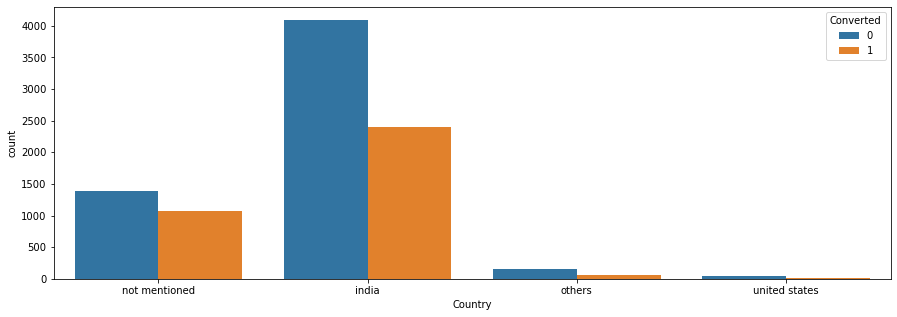

In [40]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
ax=sns.countplot(data.Country, hue=data.Converted)
ax.set_xticklabels(s1.get_xticklabels())
plt.show()

Observation: As we can see converting ratio is higher than the all other countries

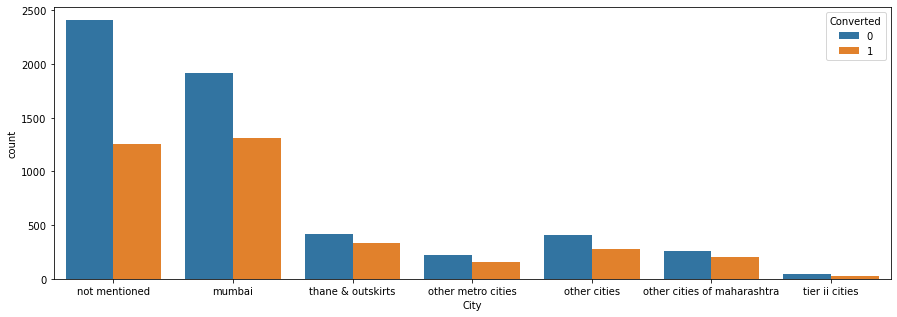

In [42]:
#plotting spread of City columnn 
plt.figure(figsize=(15,5))
ax=sns.countplot(data.City, hue=data.Converted)
plt.show()

Observation: City Bombay and Not mentioned category are having higher conversion rate in India

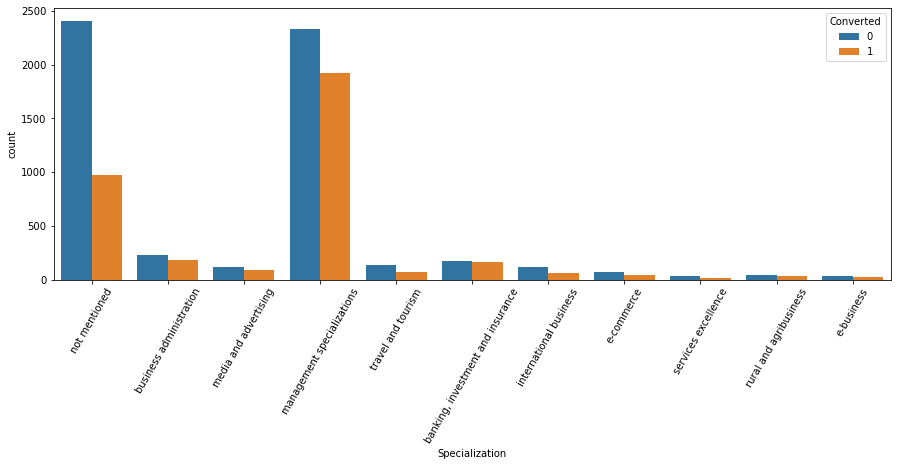

In [48]:
#plotting spread of Specialization columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)
plt.show()

Observation: Management Specialization is having high conversion rate

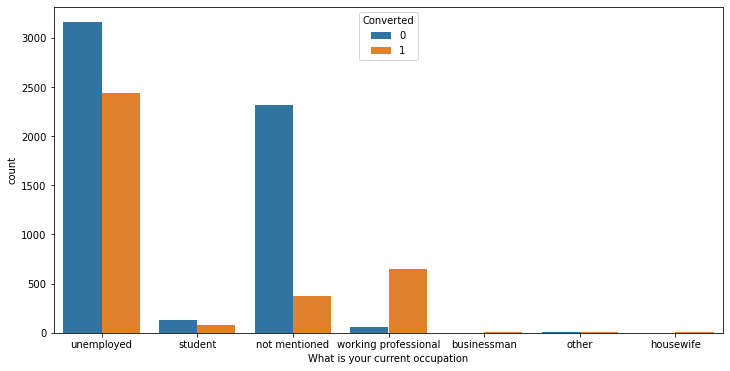

In [53]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(12,6))
s1=sns.countplot(data['What is your current occupation'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

Unemployed candidates are having higher conversion rate among all the categories 

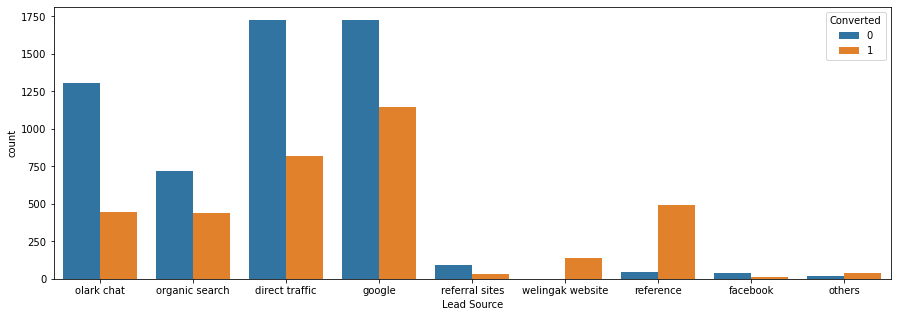

In [55]:
# visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(data['Lead Source'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

Inference
Maximum number of leads are generated by Google and Direct traffic.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

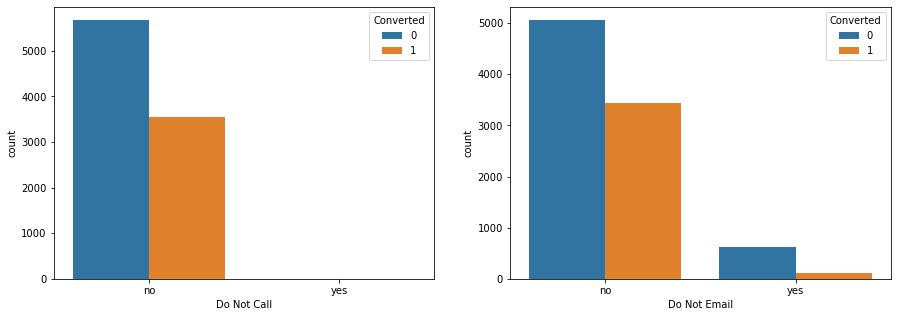

In [56]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data['Do Not Call'], hue=data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels())

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(data['Do Not Email'], hue=data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels())
plt.show()

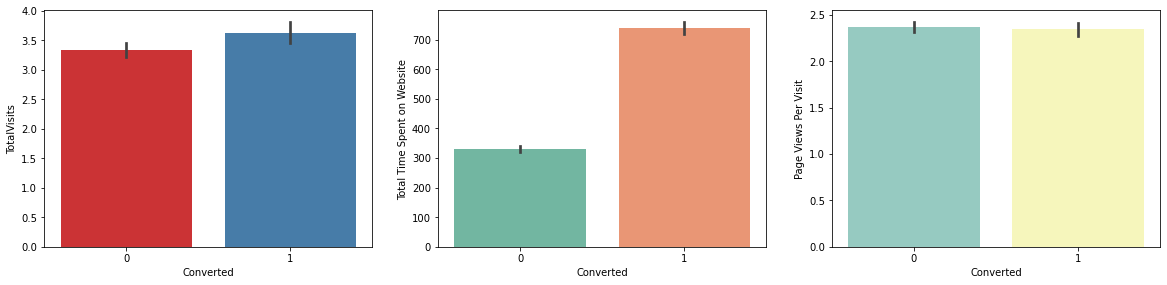

In [61]:
# Now check the conversions for all numeric values
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set3', data = data)
plt.show()

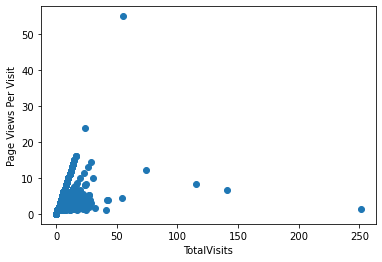

In [33]:
plt.scatter(data['TotalVisits'],data['Page Views Per Visit'])
plt.xlabel("TotalVisits")
plt.ylabel("Page Views Per Visit")
plt.show()

Scatter plot to see the distribution between Total no of visits and Page views per visits.
We have seen the outliers as well as trend.

**Outlier Treatment**

In [34]:
# seggragating the numeric columns to see the outliers
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
outlier_df = data.select_dtypes(include=num)

<Figure size 432x288 with 0 Axes>

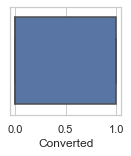

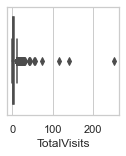

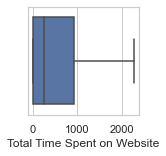

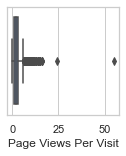

In [35]:
#Visulizing the outliers
sns.set(style="whitegrid")

f = plt.figure()
for cols,values in outlier_df.iteritems():
    f.suptitle(cols, fontsize=16)
    f, ax = plt.subplots(1,1,figsize=(2,2))
    outlier_plot = sns.boxplot(outlier_df[cols])
    plt.show()

In [37]:
data[['TotalVisits', 'Total Time Spent on Website' , 'Page Views Per Visit']].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalVisits,9240.0,3.438636,4.819024,0.0,1.0,3.0,5.0,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.0,2272.0
Page Views Per Visit,9240.0,2.357440,2.145781,0.0,1.0,2.0,3.0,55.0


In [68]:
# Removing values beyond 99% for Page Views Per Visit
nn_quartile_total_visits = data['Page Views Per Visit'].quantile(0.99)
data = data[data["Page Views Per Visit"] < nn_quartile_total_visits]
data["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9120.000000
mean        2.241274
std         1.828670
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.500000
Name: Page Views Per Visit, dtype: float64

In [69]:
# Removing values beyond 99% for Total Visits
nn_quartile_total_visits = data['TotalVisits'].quantile(0.99)
data = data[data["TotalVisits"] < nn_quartile_total_visits]
data["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9011.000000
mean        3.061369
std         2.743878
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
90%         7.000000
95%         8.000000
99%        12.000000
max        15.000000
Name: TotalVisits, dtype: float64

In [70]:
# Determine the percentage of data retained
num_data = round(100*(len(data)/9240),2)
print(num_data)

97.52


In [72]:
data.shape

(9011, 23)

**Encoding using get_dummies()**

In [73]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [74]:
numeric_data.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [75]:
encoded_cols = pd.get_dummies(data[categorical_data.columns], drop_first=True)

In [74]:
categorical_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Lead Quality', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [76]:
data = data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Lead Quality', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [77]:
data = pd.concat([data,encoded_cols], axis=1)

In [29]:
data.shape

(9240, 121)

In [78]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


**Train-test split**

In [78]:
from sklearn.model_selection import train_test_split
X = data.drop(['Converted'],axis=1)
y = data[['Converted']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
num_vars = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']

In [83]:
data[num_vars] = scaler.fit_transform(data[num_vars])

**Correlation Matrix**

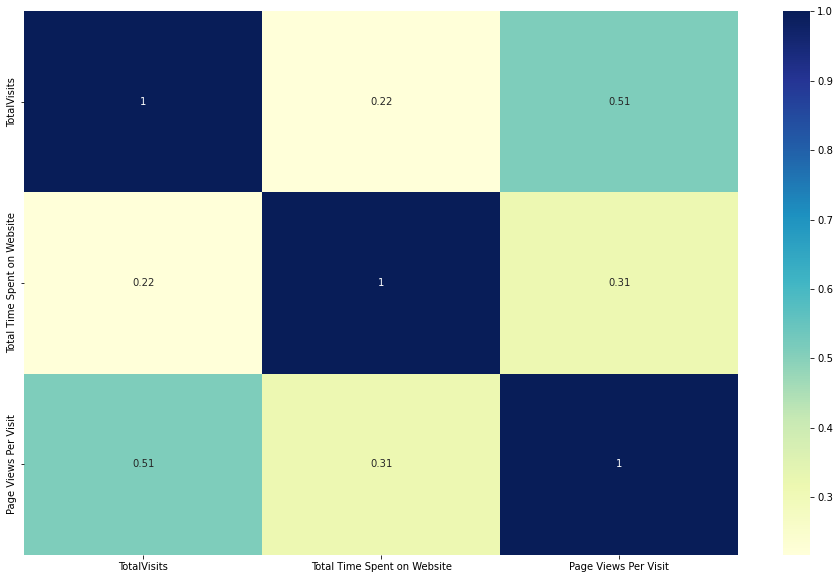

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16, 10))
sns.heatmap(data[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

**Standardization**

In [81]:
scaler.fit(X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])
X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.transform(X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

In [82]:
X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

In [83]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6224
Model Family:                Binomial   Df Model:                           82
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 12 Nov 2022   Deviance:                       47249.
Time:                        06:38:58   Pearson chi2:                 2.31e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 3.633e+15   7.47e+07   4.86e+07      0.000    3.63e+15    3.63e+15
TotalVisits                                           8.006e+13   1.36e+06    5.9e+07      0.000    8.01e+13    8.01e+13
Total Time Spent on Website                            1.83e+14   1.03e+06   1.77e+08      0.000    1.83e+14    1.83e+14
Page Views Per Visit                                 -3.944e+12   1.47e+06  -2.68e+06      0.000   -3.94e+12   -3.94e+12
Lead Origin_landing page submission                  -2.565e+14   3.99e+06  -6.43e+07      0.000   -2.57e+14   -2.57e+14
Lead Origin_lead add form                              3.33e+14   2.02e+07   1.65e+07      0.000    3.33e+14    3.33e+14
Lead Origin_lead import                               9.211e+14   4.95e+07   1.86e+07      0.000    9.21e+14    9.21e+14
Lead Origin_quick add form                             -41.6769   1.47e-06  -2.84e+07      0.000     -41.677     -41.677
Lead Source_facebook                                 -1.095e+15   4.91e+07  -2.23e+07      0.000    -1.1e+15    -1.1e+15
Lead Source_google                                    1.919e+13   2.93e+06   6.55e+06      0.000    1.92e+13    1.92e+13
Lead Source_olark chat                               -1.718e+14   7.29e+06  -2.36e+07      0.000   -1.72e+14   -1.72e+14
Lead Source_organic search                           -8.575e+13   3.33e+06  -2.58e+07      0.000   -8.57e+13   -8.57e+13
Lead Source_others                                   -1.418e+14   1.69e+07   -8.4e+06      0.000   -1.42e+14   -1.42e+14
Lead Source_reference                                -4.779e+14   1.99e+07  -2.41e+07      0.000   -4.78e+14   -4.78e+14
Lead Source_referral sites                           -3.439e+13   8.44e+06  -4.07e+06      0.000   -3.44e+13   -3.44e+13
Lead Source_welingak website                          3.885e+14   2.05e+07   1.89e+07      0.000    3.89e+14    3.89e+14
Do Not Email_yes                                     -1.811e+14   4.57e+06  -3.96e+07      0.000   -1.81e+14   -1.81e+14
Do Not Call_yes                                       -1.35e+15   6.76e+07     -2e+07      0.000   -1.35e+15   -1.35e+15
Last Activity_converted to lead                       -2.88e+15   2.46e+07  -1.17e+08      0.000   -2.88e+15   -2.88e+15
Last Activity_email bounced                          -3.182e+15    2.5e+07  -1.27e+08      0.000   -3.18e+15   -3.18e+15
Last Activity_email link clicked                     -2.636e+15   2.57e+07  -1.02e+08      0.000   -2.64e+15   -2.64e+15
Last Activity_email marked spam                       2.052e+13   4.13e+07   4.97e+05      0.000    2.05e+13    2.05e+13
Last Activity_email opened                           -2.65

**Model Building**

In [84]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [85]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [86]:
# Use score method to get accuracy of model
prediction = logisticRegr.predict(X_train)
test_score = logisticRegr.score(X_test, y_test)
test_score

0.9363905325443787

In [195]:
X_train.shape

(6468, 115)

In [196]:
X_test.shape

(2772, 115)

In [87]:
train_pred = logisticRegr.predict(X_train)
y_pred = logisticRegr.predict(X_test)

In [88]:
from sklearn import metrics
train_score = metrics.accuracy_score(y_train, train_pred)
test_score = metrics.accuracy_score(y_test, y_pred)
print("train score", train_score)
print("test score", test_score)

train score 0.9405422546377041
test score 0.9363905325443787


**Confusion Matrix**

<Figure size 720x360 with 0 Axes>

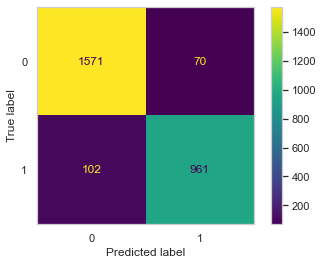

In [116]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#conf_mat = confusion_matrix(y_test, y_pred)
#class_names=[0,1]
#print(conf_mat)
#plt.figure(figsize=(10,5))

#plt.grid(False)
plt.figure(figsize=(10,5))
plot_confusion_matrix(logisticRegr, X_test, y_test)  
plt.grid(False)
plt.show()

**Evaluation Metrics**

In [94]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = logisticRegr.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = logisticRegr.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :\n\n",cm)
print("\n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  \t", metrics.roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  ", metrics.precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  \t", metrics.recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  \t", metrics.f1_score(y_test,y_pred_test))

confusion Matrix is :

 [[1571   70]
 [ 102  961]]


ROC-AUC score  test dataset:  	 0.9810698109302831
precision score  test dataset:   0.9321047526673133
Recall score  test dataset:  	 0.9040451552210724
f1 score  test dataset :  	 0.9178605539637058


We have achieved a pretty good Recall score and ROC-AUC score

**Creating a dataframe with a probability score adjusting the optimal cut-off point as 0.7**

In [95]:
dep_data = logisticRegr.predict_proba(X_test)[::,1]
dep_data = pd.DataFrame(dep_data)
dep_data['Prospect ID'] = y_test.index #Here we should put Lead Number or Prospect ID from the original source

dep_data.rename(columns = {0:'Predicted Probabilities', 'Prospect ID':'Prospect ID'}, inplace = True)
dep_data[['Prospect ID','Predicted Probabilities']].sample(10)


,Prospect ID,Predicted Probabilities
2694,253,0.035647
1851,5215,0.001295
2687,5484,0.001185
644,5058,0.652299
92,8075,0.943111
61,1817,0.491668
2448,5706,0.988231
38,3642,0.188102
555,4959,0.011585
1212,7409,0.995789


In [103]:
dep_data['Converted'] = y_test.values
dep_data['Predicted'] = dep_data['Predicted Probabilities'].map(lambda x: 1 if x > 0.7 else 0) # Defining an optimal cut-off 0f 0.7
dep_data['Score'] = round(dep_data['Predicted Probabilities']*100,2)
dep_data[['Prospect ID','Converted','Predicted','Score']].sample(5)

,Prospect ID,Converted,Predicted,Score
1176,9126,1,1,99.11
1015,1286,1,1,74.83
965,7457,0,0,2.11
1424,2359,0,1,97.56
456,5913,1,1,99.64


In [ ]:
#Leave this part for testing purpose 

In [218]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Origin_quick add form',
       'Lead Source_facebook', 'Lead Source_google', 'Lead Source_olark chat',
       ...
       'Last Notable Activity_form submitted on website',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website',
       'Last Notable Activity_resubscribed to emails',
       'Last Notable Activity_sms sent', 'Last Notable Activity_unreachable',
       'Last Notable Activity_unsubscribed',
       'Last Notable Activity_view in browser link clicked'],
      dtype='object', length=115)

In [205]:
#Deployment Test
new_data = np.array([3,57,14.26,2.993,0,1,0,0,0]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting on a new debt")

In [117]:
#Explaining the result of confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1571   70]
 [ 102  961]]


In [118]:
print("\033[1m The result is telling us that we have: " ,(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  2532 correct predictions
 The result is telling us that we have:  172 incorrect predictions
 We have a total predictions of:  2704


**Experimentation with other classification models**

**Gradient Boosting Classifier**

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=8, max_depth=4, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.875
Accuracy score (validation): 0.872
Learning rate:  0.075
Accuracy score (training): 0.894
Accuracy score (validation): 0.891
Learning rate:  0.1
Accuracy score (training): 0.905
Accuracy score (validation): 0.901
Learning rate:  0.25
Accuracy score (training): 0.932
Accuracy score (validation): 0.927
Learning rate:  0.5
Accuracy score (training): 0.943
Accuracy score (validation): 0.938
Learning rate:  0.75
Accuracy score (training): 0.947
Accuracy score (validation): 0.938
Learning rate:  1
Accuracy score (training): 0.945
Accuracy score (validation): 0.928


**Decision Tree**

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [122]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [123]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.911612426035503


In [124]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9319526627218935


In [125]:
#train and test set prediction
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set accuracy: 0.9689234184239733
Test set accuracy: 0.9319526627218935


**Random Forest**

In [126]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [127]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9434171597633136


In [128]:
#train and test set prediction
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set accuracy: 0.9914380846678293
Test set accuracy: 0.9434171597633136


**In terms of Model Performance, Random Forest is always been the first choice**

**Model Performance vs Model Interpretability Trade-off**

As of now, we have seen Logistic Regression performing well in test dataset. Random Forest giving us 94% accuracy on test data. Logistic Regression performed just 1% less comapred to Random Forest. So, we will choose Logistic Regression model this time because of the model interpretation. We can easily find the coefficient and p-value of individual feature by summarizing the model. We can say which predictor variable responsible by how much or in other words, how and precisely what change would make significance in explaining the model.
Random Forest is hard to interpret.

In [129]:
importances = clf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 15,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Lead Quality_low in relevance 0.172228
 2) Page Views Per Visit 0.127795
 3) Tags_will revert after reading the email 0.062408
 4) Tags_ringing    0.051400
 5) Last Notable Activity_unreachable 0.049974
 6) Lead Quality_not sure 0.040716
 7) Tags_interested in other courses 0.038078
 8) Lead Origin_lead import 0.031386
 9) Lead Origin_landing page submission 0.027741
10) Tags_other tags 0.027714
11) Last Activity_unreachable 0.027033
12) Total Time Spent on Website 0.026966
13) Tags_not specified 0.024620
14) What is your current occupation_other 0.024545
15) Lead Quality_not mentioned 0.022814
16) Tags_lost to eins 0.019510
17) What is your current occupation_working professional 0.016429
18) Last Notable Activity_olark chat conversation 0.014480
19) City_not mentioned 0.014370
20) Lead Quality_worst 0.014273
21) Lead Quality_might be 0.013016
22) Search_yes      0.011908
23) Lead Source_referral sites 0.011012
24) Specialization_media and advertising 0.007240
25) Lead Source_olar

IndexError: index 89 is out of bounds for axis 0 with size 89

In [133]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp.nlargest(15)

Tags_will revert after reading the email         0.172228
Total Time Spent on Website                      0.127795
Tags_ringing                                     0.062408
Tags_other tags                                  0.051400
Last Notable Activity_sms sent                   0.049974
Lead Quality_not mentioned                       0.040716
Tags_closed by horizzon                          0.038078
Lead Origin_lead add form                        0.031386
Page Views Per Visit                             0.027741
Tags_not specified                               0.027714
Last Activity_sms sent                           0.027033
TotalVisits                                      0.026966
Tags_lost to eins                                0.024620
What is your current occupation_not mentioned    0.024545
Lead Quality_might be                            0.022814
dtype: float64

**AdaBoost Classifier**

In [136]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [137]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9393491124260355


In [138]:
#train and test set prediction
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set accuracy: 0.9410179166006025
Test set accuracy: 0.9393491124260355


**Cat Boost**

In [139]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


In [140]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

0:	learn: 0.5730718	total: 183ms	remaining: 732ms
1:	learn: 0.4904534	total: 196ms	remaining: 295ms
2:	learn: 0.4233657	total: 209ms	remaining: 139ms
3:	learn: 0.3750037	total: 223ms	remaining: 55.6ms
4:	learn: 0.3334313	total: 236ms	remaining: 0us
CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [141]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,learning_rate=0.1
#     verbose=5,
)

model = clf.fit(X_train, y_train)

0:	learn: 0.5730718	total: 8.94ms	remaining: 80.4ms
1:	learn: 0.4904534	total: 17.9ms	remaining: 71.6ms
2:	learn: 0.4233657	total: 26.6ms	remaining: 62.1ms
3:	learn: 0.3750037	total: 35.7ms	remaining: 53.6ms
4:	learn: 0.3334313	total: 44.8ms	remaining: 44.8ms
5:	learn: 0.3103473	total: 53.6ms	remaining: 35.7ms
6:	learn: 0.2881988	total: 62.3ms	remaining: 26.7ms
7:	learn: 0.2691964	total: 73ms	remaining: 18.2ms
8:	learn: 0.2544694	total: 82ms	remaining: 9.11ms
9:	learn: 0.2406278	total: 90.7ms	remaining: 0us


In [142]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9271449704142012


In [143]:
#train and test set prediction
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set accuracy: 0.9307119074044712
Test set accuracy: 0.9271449704142012


**Bias-Variance Tradeoff**

1. Logistic Regression
train score 0.9405422546377041
test score 0.9363905325443787

2. Gradient Boosting Classifier
Accuracy score (training): 0.945
Accuracy score (validation): 0.928

3. Decision Tree
Train set accuracy: 0.9689234184239733
Test set accuracy: 0.9319526627218935

4. Random Forest
Train set accuracy: 0.9914380846678293
Test set accuracy: 0.9434171597633136

5. Adaboost
Train set accuracy: 0.9410179166006025
Test set accuracy: 0.9393491124260355

6. Catboost
Train set accuracy: 0.9307119074044712
Test set accuracy: 0.9271449704142012

Here we can see, Random Forest is giving us the best performance where we are getting test score better than trainset score. Logistic Regression model is also performing well. Random Forest captured some noise, giving us low test score comapred to train score. This indicating high variance model or in other words we can say it's overfitted as the difference margin of train and testset score is moderate but not so high.

In the model tunning part we will fix the overfitting problem of Random Forest model.

In the Model Interpretability vs Model Performance section we will discuss about the strength of interpretability of Logistic Regression and strength of performance of Random Forest in terms of model accuracy score.

**Feature Selection**

In [144]:
# Import RFE
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(logisticRegr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 46),
 ('Lead Origin_landing page submission', False, 30),
 ('Lead Origin_lead add form', False, 21),
 ('Lead Origin_lead import', False, 20),
 ('Lead Origin_quick add form', False, 72),
 ('Lead Source_facebook', True, 1),
 ('Lead Source_google', False, 45),
 ('Lead Source_olark chat', False, 56),
 ('Lead Source_organic search', False, 66),
 ('Lead Source_others', False, 9),
 ('Lead Source_reference', False, 22),
 ('Lead Source_referral sites', False, 44),
 ('Lead Source_welingak website', True, 1),
 ('Do Not Email_yes', False, 8),
 ('Do Not Call_yes', False, 53),
 ('Last Activity_converted to lead', False, 28),
 ('Last Activity_email bounced', False, 13),
 ('Last Activity_email link clicked', False, 33),
 ('Last Activity_email marked spam', False, 54),
 ('Last Activity_email opened', False, 18),
 ('Last Activity_email received', False, 70),
 ('Last Activity_form submitted on website

In [145]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
# Selecting columns selected by RFE
X_train = X_train[col]
# Importing statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1097.3
Date:                Sat, 12 Nov 2022   Deviance:                       2194.6
Time:                        06:50:52   Pearson chi2:                 9.07e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6252
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2379      0.131     -1.809      0.070      -0.496       0.020
Total Time Spent on Website                       1.0748      0.065     16.492      0.000       0.947       1.203
Lead Source_facebook                             -1.5460      0.609     -2.539      0.011      -2.739      -0.352
Lead Source_welingak website                      2.8252      0.747      3.783      0.000       1.361       4.289
Last Activity_sms sent                            2.0065      0.125     15.999      0.000       1.761       2.252
Country_not mentioned                             1.2863      0.155      8.277      0.000       0.982       1.591
What is your current occupation_not mentioned    -2.2341      0.142    -15.738      0.000      -2.512      -1.956
Tags_closed by horizzon                           6.1358      1.016      6.037      0.000       4.144       8.128
Tags_interested in other courses                 -3.0967      0.406     -7.623      0.000      -3.893      -2.301
Tags_lost to eins                                 6.1664      0.786      7.842      0.000       4.625       7.708
Tags_other tags                                  -3.3810      0.231    -14.621      0.000      -3.834      -2.928
Tags_ringing                                     -4.5911      0.248    -18.533      0.000      -5.077      -4.106
Tags_will revert after reading the email          3.1533      0.206     15.280      0.000       2.749       3.558
Lead Quality_worst                               -2.6616      0.785     -3.391      0.001      -4.200      -1.123
Last Notable Activity_modified                   -1.6015      0.136    -11.779      0.000      -1.868      -1.335
Last Notable Activity_olark chat conversation    -1.4640      0.452     -3.237      0.001      -2.350      -0.578
=================================================================================================================
"""

In [146]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_not mentioned,1.89
13,Last Notable Activity_modified,1.88
9,Tags_other tags,1.65
5,What is your current occupation_not mentioned,1.55
11,Tags_will revert after reading the email,1.51
12,Lead Quality_worst,1.51
3,Last Activity_sms sent,1.49
0,Total Time Spent on Website,1.43
6,Tags_closed by horizzon,1.19
7,Tags_interested in other courses,1.19


In [147]:
X_train.columns

Index(['Total Time Spent on Website', 'Lead Source_facebook',
       'Lead Source_welingak website', 'Last Activity_sms sent',
       'Country_not mentioned',
       'What is your current occupation_not mentioned',
       'Tags_closed by horizzon', 'Tags_interested in other courses',
       'Tags_lost to eins', 'Tags_other tags', 'Tags_ringing',
       'Tags_will revert after reading the email', 'Lead Quality_worst',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation'],
      dtype='object')

**Selecting top 15 features using a hybrid approach: after looking at p-value, VIF, RFE output and applying Random Forest's Feature Importance technique**

In [148]:
new_data = data[['Tags_will revert after reading the email','Total Time Spent on Website','Tags_ringing', 'Tags_other tags', 
'Last Notable Activity_sms sent', 'Last Activity_sms sent', 'Lead Source_facebook', 'Lead Source_welingak website',
'Tags_closed by horizzon', 'Lead Origin_lead add form', 'Page Views Per Visit','TotalVisits', 'Tags_lost to eins',
'Last Notable Activity_olark chat conversation', 'Lead Quality_might be','Converted']]

In [157]:
new_data.shape

(9011, 16)

In [163]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9011 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Tags_will revert after reading the email       9011 non-null   uint8  
 1   Total Time Spent on Website                    9011 non-null   int64  
 2   Tags_ringing                                   9011 non-null   uint8  
 3   Tags_other tags                                9011 non-null   uint8  
 4   Last Notable Activity_sms sent                 9011 non-null   uint8  
 5   Last Activity_sms sent                         9011 non-null   uint8  
 6   Lead Source_facebook                           9011 non-null   uint8  
 7   Lead Source_welingak website                   9011 non-null   uint8  
 8   Tags_closed by horizzon                        9011 non-null   uint8  
 9   Lead Origin_lead add form                      9011 

In [164]:
from sklearn.model_selection import train_test_split
X = new_data.drop(['Converted'],axis=1)
y = new_data[['Converted']]

In [165]:
X.shape

(9011, 15)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [168]:
scaler.fit(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [170]:
print(X_train.shape)
print(y_test.shape)

(6307, 15)
(2704, 1)


In [177]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [178]:
train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

In [179]:
from sklearn import metrics
train_score = metrics.accuracy_score(y_train, train_pred)
test_score = metrics.accuracy_score(y_test, y_pred)
print("train score", train_score)
print("test score", test_score)

train score 0.9273822736641827
test score 0.926405325443787


**Here we can see that only top 15 variables are well enough to explain 92.6% of model performance. So, We will ignore the other features which are having very less explanation power for this problem statement.**

**Top 3 features:**

    1. Tags_will revert after reading the email
    
    2. Total Time Spent on Website
    
    3. Tags_ringing

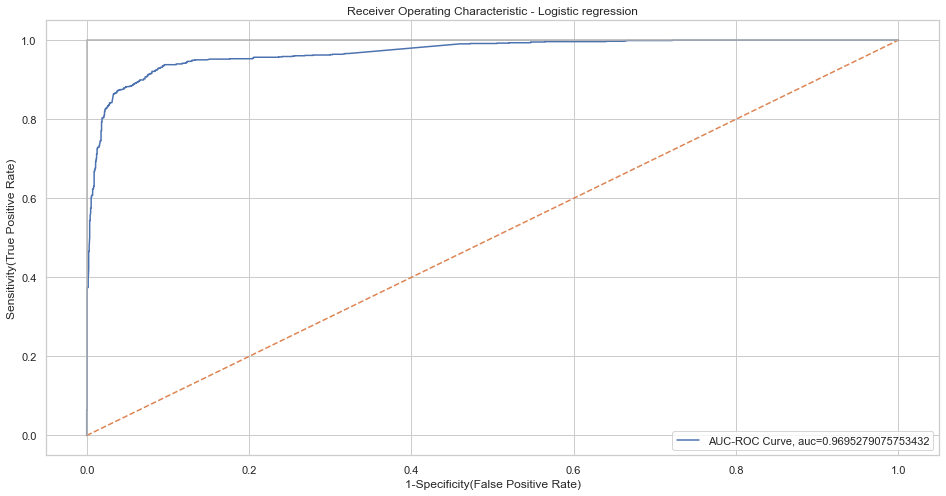

In [196]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#plt.figure(figsize=(16,8))
#plt.plot(fpr,tpr,label="AUC-ROC Curve, auc="+str(auc))
#plt.legend(loc=4) 
#plt.show()
plt.subplots(1, figsize=(16,8))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr, tpr,label="AUC-ROC Curve, auc="+str(auc))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.legend(loc=4)
plt.show()

In [188]:
# ROC- AUC score
print("ROC-AUC score  test dataset:  \t", metrics.roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  ", metrics.precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  \t", metrics.recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  \t", metrics.f1_score(y_test,y_pred_test))

ROC-AUC score  test dataset:  	 0.9810698109302831
precision score  test dataset:   0.9321047526673133
Recall score  test dataset:  	 0.9040451552210724
f1 score  test dataset :  	 0.9178605539637058


**Specificity vs Sensivity Trade-off:**
Sensitivity is the proportion of True Positives or the proportion of cases correctly identified by the test as meeting a certain condition.

Specificity is the proportion of True Negatives or the proportion of cases correctly identified by the test as not meeting a certain condition.

But there is always a trade-off between sensitivity and Specificity. We cannot have 100 % Sensitivity and 100% Specificity. Balancing between the two is important.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

We have balanced dataset in this case study and here, we can see ROC-AUC score  on test dataset is 98.1%, which is amazing!!! 

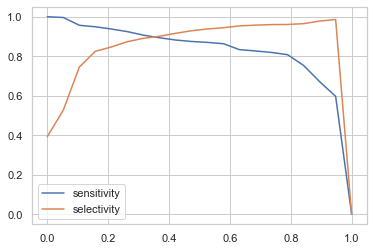

In [193]:
from sklearn.metrics import precision_score, recall_score

# Get the estimated probabilities of each observation being categorized as positive
# [:,1] for probabilities of negative
#predicted_y_probs = rfc.predict_proba(test_x)[:,0]

thresholds = np.linspace(0,1,20) #0.7 # or however many points you want

sensitivities = [recall_score(y_test, y_pred_proba >= t) for t in thresholds]
selectivities = [precision_score(y_test, y_pred_proba >= t) for t in thresholds]
plt.plot(thresholds, sensitivities, label='sensitivity')
plt.plot(thresholds, selectivities, label='selectivity')
plt.legend()

In [174]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [175]:
#train and test set prediction
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set accuracy: 0.9278579356270811
Test set accuracy: 0.9230769230769231


In [222]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

In [223]:
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

In [224]:
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBC.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [225]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.02, max_depth=4, n_estimators=500,
                           subsample=0.2)

 The best score across ALL searched params:
 0.9438775510204082

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}


**Hyperparameter Tunning**

In [197]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [198]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn import linear_model, tree, ensemble
#For training without cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [199]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(RandomForestClassifier(n_estimators = 100, random_state= 42), 
                        X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.92155309 0.91204437 0.90880254 0.89849326 0.91038858]
Average score: 0.910


In [200]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [201]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = RandomForestClassifier(n_estimators = 100, random_state= 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [202]:
clf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [203]:
#Run the model substituting the best parameters
forest = RandomForestClassifier(random_state=42,n_estimators= 1000,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= True)

In [204]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1000,
                       random_state=42)

In [205]:
#train and test set prediction
y_pred = forest.predict(X_test)
y_pred_train = forest.predict(X_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set accuracy: 0.9326145552560647
Test set accuracy: 0.9267751479289941


In [206]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
clf = RandomForestClassifier(random_state= 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [207]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [208]:
#Run the model substituting the best parameters
forest = RandomForestClassifier(random_state=42,n_estimators= 100,
 min_samples_split= 12,
 min_samples_leaf= 5,
 max_features= 3,
 max_depth= 80,
 bootstrap= True)

In [209]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, random_state=42)

In [210]:
#train and test set prediction
y_pred = forest.predict(X_test)
y_pred_train = forest.predict(X_train)
print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))

Train set accuracy: 0.9334073251942286
Test set accuracy: 0.9256656804733728


In [211]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1590   51]
 [ 150  913]]


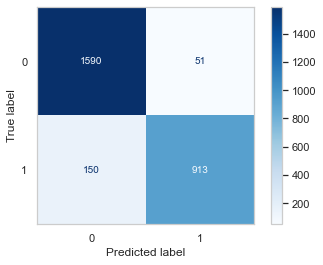

In [213]:
disp = plot_confusion_matrix(forest, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [214]:
from sklearn.metrics import classification_report
target_names = ['Not Converted', 'Converted']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Converted       0.91      0.97      0.94      1641
    Converted       0.95      0.86      0.90      1063

     accuracy                           0.93      2704
    macro avg       0.93      0.91      0.92      2704
 weighted avg       0.93      0.93      0.92      2704



In [215]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [216]:
print("Sensitivity: ",round((TP/(TP+TN))*100,2))

Sensitivity:  36.48


In [217]:
print("Specificity: ",round((TN/(TN+FP))*100,2))

Specificity:  96.89


In [218]:
precision = TP/(TP+FP)
print("Precision: ",round((TP/(TP+FP))*100,2))

Precision:  94.71


In [219]:
recall = TP/(TP+FN)
print("Recall: ",round((TP/(TP+FN))*100,2))

Recall:  85.89


Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 95% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 83% of the time.

In [220]:
print("F1 Score: ",2*((precision*recall)/(precision+recall))*100)

F1 Score:  90.08386778490379


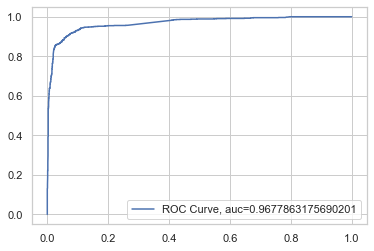

In [222]:
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
plt.legend(loc=4) 
plt.show()

**Thank You!!!**